Use obspy to generate ray paths that can then be viewed over the terra model using paraview.

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import terra as t
from mpl_toolkits.basemap import Basemap
plt.switch_backend("nbagg")
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 10, 8

Select a 1-D model to calculate ray paths

In [18]:
from obspy.taup import TauPyModel
model = TauPyModel(model="iasp91")

Copy model to local directory and add a discontuity at 2091 from which to generate underside reflection paths.

In [4]:
from obspy.taup import taup_create
taup_create.get_builtin_model_files()

[u'/Users/glyjw/anaconda/lib/python2.7/site-packages/obspy/taup/data/ak135.tvel',
 u'/Users/glyjw/anaconda/lib/python2.7/site-packages/obspy/taup/data/iasp91.tvel',
 u'/Users/glyjw/anaconda/lib/python2.7/site-packages/obspy/taup/data/1066a.nd',
 u'/Users/glyjw/anaconda/lib/python2.7/site-packages/obspy/taup/data/1066b.nd',
 u'/Users/glyjw/anaconda/lib/python2.7/site-packages/obspy/taup/data/ak135f_no_mud.nd',
 u'/Users/glyjw/anaconda/lib/python2.7/site-packages/obspy/taup/data/herrin.nd',
 u'/Users/glyjw/anaconda/lib/python2.7/site-packages/obspy/taup/data/jb.nd',
 u'/Users/glyjw/anaconda/lib/python2.7/site-packages/obspy/taup/data/prem.nd',
 u'/Users/glyjw/anaconda/lib/python2.7/site-packages/obspy/taup/data/pwdk.nd',
 u'/Users/glyjw/anaconda/lib/python2.7/site-packages/obspy/taup/data/sp6.nd']

Copied iasp91.tel to myiasp91.tvel and manually added a discontinuity at 2096.5 km depth.
The below code will build a model using this custom model file and underside reflection paths from this discontinuity
can be calculated.

In [14]:
from obspy.taup.taup_create import build_taup_model
from obspy.taup import TauPyModel
build_taup_model("models/myiasp91.tvel",output_folder="models")
model = TauPyModel(model="models/myiasp91.npz")

Building obspy.taup model for 'models/myiasp91.tvel' ...


Basic plot of ray paths as demonstrated in obspy tutorial.

<IPython.core.display.Javascript object>


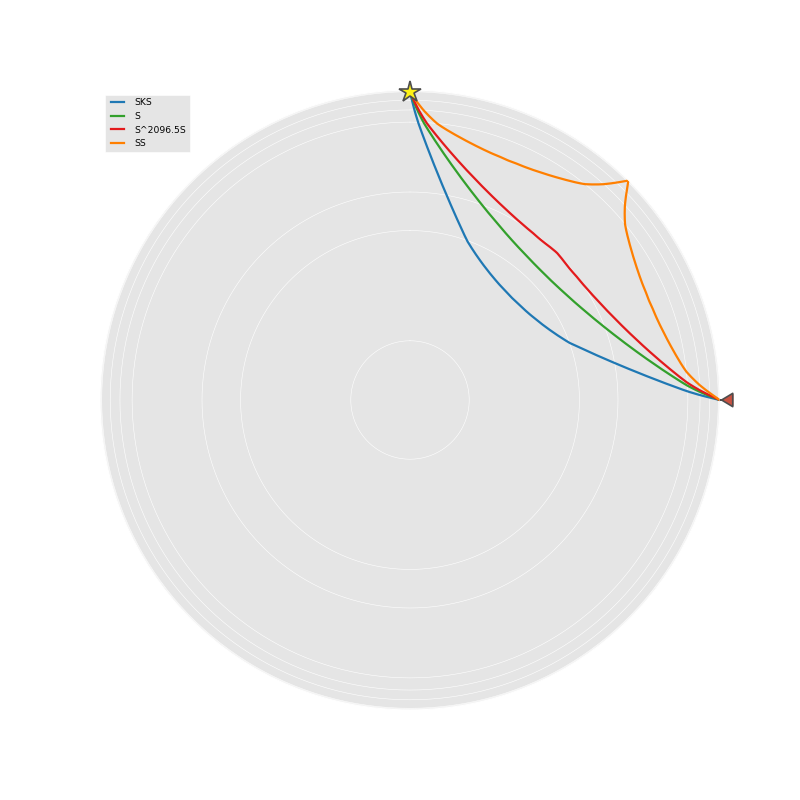

In [15]:
arrivals = model.get_ray_paths(
...     source_depth_in_km=50,
...     distance_in_degree=90,
...     phase_list=["SKS","SS","S^2096.5S","S"])
arrivals.plot() 

Utility function to build a discontinuity into a model at arbitrary depth.

In [ ]:
def add_a_discontinuity(infile,outfile,depth):
    

In [11]:
evdepth = 624.7
evlat = -26.57
evlon = 178.34
stlat = -22.9811
stlon = 30.0202

# evdepth = 624.7
# evlat = 0.
# evlon = 90.
# stlat = -30.
# stlon = -30.

arrivals = model.get_ray_paths_geo(
      evdepth,evlat,evlon,
      stlat,stlon,
      phase_list = ["S^2096.5S"])

def sph2cart(lat,lon,r):
    ray = np.empty([lat.size,3])
    lat = np.deg2rad(lat)
    lon = np.deg2rad(lon)
    ray[:,2] = r * np.sin(lat)
    ray[:,1] = r * np.cos(lat) * np.sin(lon)
    ray[:,0] = r * np.cos(lat) * np.cos(lon)
    return ray


r=6371.

s = arrivals[0].path

ray = sph2cart(s['lat'],s['lon'],(r - s['depth'])/r)


In [12]:
def raytoline(ray):
    # convert a ray of 3d points to an array of line vertices 
    # for vtk file creation.
    
    # copy over ray info to temp arrays
    a = ray[:-1,:]
    b = ray[1:,:]
    return np.column_stack((a,b)).reshape([a.shape[0]*2,3])
    
    

Generate a ray in cartesian co-ordinates

In [13]:
# test line
# linex = np.array([0,1,1,2,2,3])
# liney = np.array([0,1,1,1,1,3])
# linez = np.array([0,1,1,3,3,3])

# linex = np.array([ -2.45000000e+01,  -2.76625640e+01,  -2.76625640e+01,
#         -3.29104544e+01,  -3.29104544e+01,  -3.81570454e+01])
# liney = np.array([-0., -0., -0., -0., -0., -0.])
# linez = np.array([ -4.24352448e+01,  -4.79486954e+01,  -4.79486954e+01,
#         -5.71160870e+01,  -5.71160870e+01,  -6.63045239e+01])


from evtk.hl import linesToVTK
# linesToVTK("./line",linex,liney,linez)


# use function to generate line from ray
line = raytoline(ray)
linex = np.copy(line[:,0])
liney = np.copy(line[:,1])
linez = np.copy(line[:,2])
linesToVTK("./line",linex,liney,linez)

# get VTK file of line
# linesToVTK("./line",line[:6,0],line[:6,1],line[:6,2])

# linesToVTK("./line",ray[:,0],ray[:,1],ray[:,2])
# linesToVTK("./line",ray[:,0],ray[:,1],ray[:,2])

'/Users/glyjw/TERRA/terrapy/line.vtu'